### PROBLEM STATEMENT:
Using the Pima Indians Diabetes dataset. Predict whether a patient is diabetic or not, using Voting Classifier. Use different classification algorithms to build the base models. Perform necessary Exploratory Data Analysis before Model building step. Tune the parameters using GridSearchCV and check for the improvement. Evaluate the model based on performance metrics other than model accuracy.

### Data Definition:

- Variables in the Pima Indians Diabetes dataset:
###### Pregnancies:
- Number of times pregnant
###### Glucose:
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
###### BloodPressure:
- Diastolic blood pressure(mm Hg)
###### SkinThickness
- Triceps skin fold thickness (mm)
###### Insulin:
- 2-Hour serum insulin (mu U/ml)
###### BMI:
- Body mass index (weight in kg/(height in m)^2)
###### DiabetesPedigreeFunction:
- Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
###### Age
- Age(years)
###### Outcome
- Class variable (0 if non-diabetic, 1 if diabetic)

### CONTENTS:

1. Import packages


2. Load the data 


3. Understand the data


4. Exploratory Data Analysis
- 4.1 Datatypes
- 4.2 Univariate Analysis
- 4.3 Statistical Summary
- 4.4 Missing values detection and treatment
- 4.5 Duplicated values detection and treatment
- 4.6 Outlier detection and treatment using Z-Score method
- 4.7 Correlation matrix
- 4.8 Splitting the data into feature and target variables
- 4.9 Data Normalization

5. Base Model Building
- 5.1 Instantiating base model objects
- 5.2 Splitting the data using Stratified K-Fold method
- 5.3 Mean Accuracy 

6. Hyperparameter Tuning
- 6.1 Logistic Regression
- 6.2 K-Nearest Neighbors
- 6.3 Random Forest
- 6.4 Support Vector Machines
- 6.5 AdaBoost
- 6.6 Gradient Boosting
- 6.7 XGBoost
- 6.8 Mean Accuracy after Hyperparameter tuning
- 6.9 Accuracy of the best saved models

7. Voting Classifier


8. Performance Metrics
- 8.1 Confusion matrix
- 8.2 ROC curve
- 8.3 Performance metrics in tabulated format


9. Conclusion

### 1. Import Packages

In [1]:
# To perform complex mathematical operations
import numpy as np

# For reading and manipulating data
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

# For data Normalization
from sklearn.preprocessing import StandardScaler

# For splitting the data into training and testing sets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# For checking performance of the model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# For model building
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
# 2. KNN
from sklearn.neighbors import KNeighborsClassifier
# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
# 4. SVM
from sklearn.svm import SVC
# 5. Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
# 6. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# 7. XGBoost
from xgboost import XGBClassifier
# 8. Voting Classifier
from sklearn.ensemble import VotingClassifier

# To tabulate the results
from tabulate import tabulate

In [2]:
# Plot setting
plt.style.use('ggplot')

### 2. Load the data

In [3]:
# Load the data
data = pd.read_csv('/content/diabetes.csv')

### 3. Understand the data

In [4]:
# Shape of the dataset
data.shape

(768, 9)

- Number of rows = 768
- Number of columns = 9

In [5]:
# First five rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 'Outcome' is the target variable. It has only 2 classes: 0(Does not have diabetes) and 1(Has diabetes), hence it is a binary classification problem.
- There are 8 independent variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age. All these variables are numeric variables. 

In [6]:
# Rename 'BloodPressure' as 'BP' and 'DiabetesPedigreeFunction' as 'DPF' for simplicity
data = data.rename(columns = {'BloodPressure':'BP', 
                              'DiabetesPedigreeFunction':'DPF'})

In [7]:
# Check if renaming is executed successfully
data.columns

Index(['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI',
       'DPF', 'Age', 'Outcome'],
      dtype='object')

### 4. Exploratory Data Analysis

###### 4.1 Datatypes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There are total 768 rows in the dataset and it can be concluded that no null-values are present in it.
- All the variables are integer type except 'BMI' and 'DPF' which is float type.

###### 4.2 Univariate Analysis

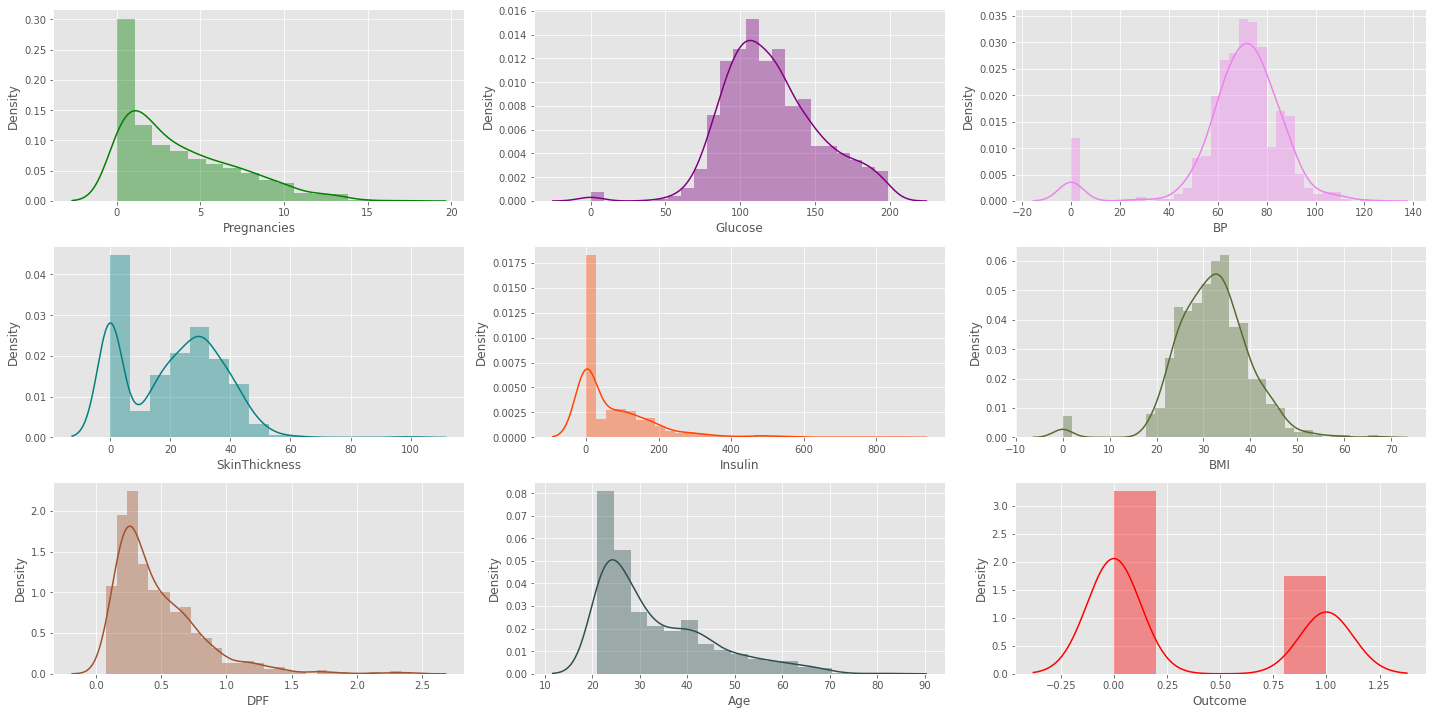

In [9]:
fig, axs = plt.subplots(3,3,figsize=(20,10))
plt1 = sns.distplot(data['Pregnancies'],ax = axs[0,0],color='green')
plt2 = sns.distplot(data['Glucose'],ax = axs[0,1], color='purple')
plt3 = sns.distplot(data['BP'],ax = axs[0,2], color='violet')
plt1 = sns.distplot(data['SkinThickness'],ax = axs[1,0], color='teal')
plt2 = sns.distplot(data['Insulin'],ax = axs[1,1], color='orangered')
plt3 = sns.distplot(data['BMI'],ax = axs[1,2], color='darkolivegreen')
plt1 = sns.distplot(data['DPF'],ax = axs[2,0], color='sienna')
plt2 = sns.distplot(data['Age'],ax = axs[2,1], color='darkslategrey')
plt3 = sns.distplot(data['Outcome'],ax = axs[2,2], color='red')
plt.tight_layout()

- Features like Pregnancies, SkinThickness, Insulin, DPF and Age are right-skewed
- Outliers are present in the dataset

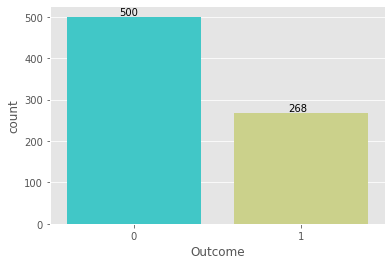

In [10]:
sns.countplot(data['Outcome'], palette='rainbow')

plt.text(x=-0.09, y=data.Outcome.value_counts()[1] + 235,
         s=str(round(data.Outcome.value_counts()[0])))

plt.text(x=0.92, y=data.Outcome.value_counts()[0] - 229,
         s=str(round(data.Outcome.value_counts()[1])))

plt.show()

- Diabetic = 268
- Non-diabetic = 500

###### 4.3 Statistical Summary

In [12]:
data.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###### Observations:
- Minimum value in the columns Glucose, BloodPressure, SkinThickness, Insulin and BMI is 0 which does not make sense. Hence, we need to replace those zeroes with more appropriate values.
- Maximum value shows outliers are present in Pregnancies and Insulin, which will be taken care of while treating the Outliers.

In [11]:
# Replacing 0's by mean of the data
data['Glucose'] = np.where(data['Glucose']==0, np.mean(data['Glucose']),
                           data['Glucose'])
data['BP'] = np.where(data['BP']==0, np.mean(data['BP']), data['BP'])
data['SkinThickness'] = np.where(data['SkinThickness']==0,
                                 np.mean(data['SkinThickness']),
                                 data['SkinThickness'])
data['BMI'] = np.where(data['BMI']==0, np.mean(data['BMI']), data['BMI'])
data['Insulin'] = np.where(data['Insulin']==0, np.mean(data['Insulin']),
                           data['Insulin'])

In [13]:
data.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Minimum Value has been changed to values more appropriate.

###### 4.4 Missing values detection and treatment

In [14]:
# Missing values detection
data.isnull().sum()

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

- No missing values are present in the dataset

###### 4.5 Duplicated value detection and treatment

In [15]:
# Duplicated value
data.duplicated().sum()

0

- No duplicate values present in the dataset

###### 4.6 Outlier detection and treatment using Z_Score method

###### Finding the boundary values

In [16]:
Attributes = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 
              'BMI', 'DPF', 'Age', 'Outcome']

for i in Attributes:
    Max_Boundary_Value = []
    Min_Boundary_Value = []
    
    h = data[i].mean() + 3*data[i].std()
    l = data[i].mean() - 3*data[i].std()
    
    Max_Boundary_Value.append(h)
    Min_Boundary_Value.append(l)
    
    print(i)
    print('******************************')
    print('Max_BV:', Max_Boundary_Value)
    print('Min_BV:', Min_Boundary_Value)
    print()

Pregnancies
******************************
Max_BV: [13.953786271429921]
Min_BV: [-6.263682104763253]

Glucose
******************************
Max_BV: [212.98965195285027]
Min_BV: [30.37355808946745]

BP
******************************
Max_BV: [108.60260131331626]
Min_BV: [35.90701172379312]

SkinThickness
******************************
Max_BV: [55.50020135326963]
Min_BV: [-2.287242911429395]

Insulin
******************************
Max_BV: [397.90123598664564]
Min_BV: [-160.5809099232768]

BMI
******************************
Max_BV: [53.07692567769133]
Min_BV: [11.824684633181015]

DPF
******************************
Max_BV: [1.4658620871216572]
Min_BV: [-0.5221094829549917]

Age
******************************
Max_BV: [68.5215800387027]
Min_BV: [-2.039809205369373]

Outcome
******************************
Max_BV: [1.7798124650617246]
Min_BV: [-1.0818957983950581]



###### Outlier Detection

In [17]:
# Outliers in the attribute 'Pregnancies'
data[(data['Pregnancies'] > 13.88) |
     (data['Pregnancies'] < -6.21)].index.tolist()

[88, 159, 298, 455]

In [18]:
# Outliers in the attribute 'Glucose'
data[(data['Glucose'] > 212.96) | (data['Glucose'] < 30.23)].index.tolist()

[]

In [19]:
# Outliers in the attribute 'BP'
data[(data['BP'] > 108.01) | (data['BP'] < 36.21)].index.tolist()

[18, 43, 106, 125, 177, 549, 597, 691]

In [20]:
# Outliers in the attribute 'SkinThickness'
data[(data['SkinThickness'] > 55.96) | (data['SkinThickness'] < -3.66)].index.tolist()

[57, 120, 445, 579]

In [21]:
# Outliers in the attribute 'Insulin'
data[(data['Insulin'] > 328.54) | (data['Insulin'] < -107.08)].index.tolist()

[8,
 13,
 54,
 111,
 153,
 186,
 220,
 228,
 231,
 247,
 248,
 258,
 286,
 296,
 370,
 392,
 409,
 415,
 486,
 574,
 584,
 645,
 655,
 695,
 707,
 710,
 715,
 753]

In [22]:
# Outliers in the attribute 'BMI'
data[(data['BMI'] > 52.65) | (data['BMI'] < 12.05)].index.tolist()

[120, 125, 177, 303, 445, 673]

In [23]:
# Outliers in the attribute 'DPF'
data[(data['DPF'] > 1.37) | (data['DPF'] < -0.44)].index.tolist()

[4, 12, 39, 45, 58, 147, 228, 308, 330, 370, 371, 395, 445, 593, 621, 622, 661]

In [24]:
# Outliers in the attribute 'Age'
data[(data['Age'] > 68.25) | (data['Age'] < -1.81)].index.tolist()

[123, 453, 459, 666, 684]

In [25]:
# Outliers in the attribute 'Outcome'
data[(data['Outcome'] > 1.77) | (data['Outcome'] < -1.08)].index.tolist()

[]

- Number of Outliers present in each attribute:
1. Pregnancies: 4
2. Glucose: 0
3. BP: 8
4. SkinThickness: 4
5. Insulin: 28
6. BMI: 6
7. DPF: 17
8. Age: 5
9. Outcome: 0

###### Trimming the Outliers

In [26]:
new_data = data[(data['Pregnancies'] < 13.88) & (data['Pregnancies'] > -6.21)]

In [27]:
new_data = new_data[(new_data['BP'] < 108.01) & (new_data['BP'] > 36.21)]

In [28]:
new_data = new_data[(new_data['SkinThickness'] < 55.96) & (new_data['SkinThickness'] > -3.66)]

In [29]:
new_data = new_data[(new_data['Insulin'] < 328.54) & (new_data['Insulin'] > -107.08)]

In [30]:
new_data = new_data[(new_data['BMI'] < 52.65) & (new_data['BMI'] > 12.05)]

In [31]:
new_data = new_data[(new_data['DPF'] < 1.37) & (new_data['DPF'] > -0.44)]

In [32]:
new_data = new_data[(new_data['Age'] < 68.25) & (new_data['Age'] > -1.81)]

In [33]:
new_data.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.834993,119.441640,72.162996,26.048290,104.588071,32.065908,0.440802,32.896159,0.334282
std,3.284874,29.383161,11.266721,8.914018,56.109178,6.442479,0.269797,11.305359,0.472075
min,0.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.400000,0.240500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,79.799479,32.000000,0.361000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.500000,36.050000,0.591000,40.000000,1.000000
max,13.000000,198.000000,108.000000,54.000000,328.000000,52.300000,1.353000,68.000000,1.000000


- Looking at the minimum and maximum values of variables we can conclude that the Outliers has been successfully removed. And the data lies between 3 standard deviations.

In [34]:
# Checking the shape after removing all the Outliers
new_data.shape

(703, 9)

- 65 Outliers were removed.

###### 4.7 Correlation matrix

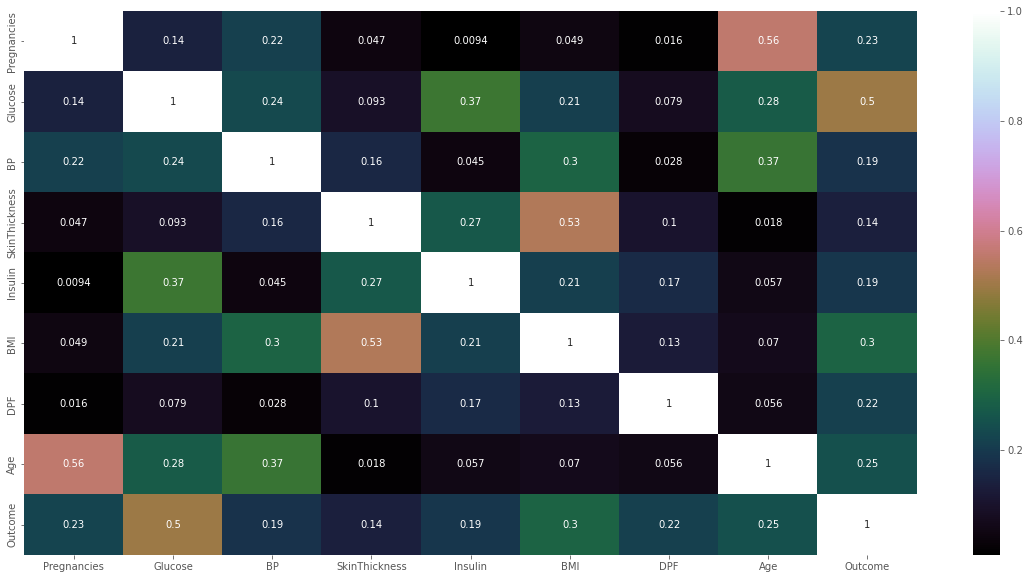

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(new_data.corr(), annot=True, cmap='cubehelix')

- All variables are positively correlated to the target variable.

###### 4.8 Splitting the data 

In [36]:
# Splitting the dataset into features and target variable

X = new_data.loc[:, new_data.columns != 'Outcome']                    # Feature variable
y = new_data['Outcome']                                               # Target variable

In [37]:
print(X.shape)
print(y.shape)

(703, 8)
(703,)


###### 4.9 Data Normalization

In [38]:
scale = StandardScaler()
X = scale.fit_transform(X)
X

array([[ 0.65955301,  0.9726215 , -0.0144773 , ...,  0.23829095,
         0.69063114,  1.51397393],
       [-0.8636591 , -1.17299029, -0.54739826, ..., -0.84902092,
        -0.33308811, -0.16784159],
       [ 1.26883786,  2.16462805, -0.72503858, ..., -1.36161081,
         0.85754188, -0.07932498],
       ...,
       [ 0.35491059,  0.05307359, -0.0144773 , ..., -0.91115303,
        -0.72625565, -0.25635819],
       [-0.8636591 ,  0.22336024, -1.08031922, ..., -0.30536499,
        -0.34050637,  1.24842411],
       [-0.8636591 , -0.90053165, -0.19211762, ..., -0.25876591,
        -0.46661671, -0.87597444]])

### 5. Model Building

###### 5.1 Instantiating model objects

In [39]:
# Logistic Regression
log_reg = LogisticRegression(random_state=150)

# K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=12)

# Random Forest
rf = RandomForestClassifier(random_state=150)

# Support Vector Machines
svm = SVC(random_state=50)

# AdaBoost
adaboost = AdaBoostClassifier(random_state=150)

# Gradient Boosting
GB = GradientBoostingClassifier(random_state=150)

# XGBoost
XGB = XGBClassifier(random_state=150)

###### 5.2 Splitting the data using Stratified K-Fold method

In [40]:
# Setting K-Fold value to 10
Skfold = StratifiedKFold(10)

###### 5.3 Mean Accuracy

In [41]:
result_lr = cross_val_score(log_reg, X, y, cv = Skfold)
result_knn = cross_val_score(knn, X, y, cv = Skfold)
result_rf = cross_val_score(rf, X, y, cv = Skfold)
result_svm = cross_val_score(svm, X, y, cv = Skfold)
result_adaboost = cross_val_score(adaboost, X, y, cv = Skfold)
result_GB = cross_val_score(GB, X, y, cv = Skfold)
result_XGB = cross_val_score(XGB, X, y, cv = Skfold)

In [42]:
result = [result_lr, result_knn, result_rf, result_svm, 
          result_adaboost, result_GB, result_XGB]

for i in result:
    print(i)
    print()

[0.73239437 0.78873239 0.77464789 0.78571429 0.77142857 0.77142857
 0.78571429 0.84285714 0.75714286 0.8       ]

[0.73239437 0.77464789 0.74647887 0.71428571 0.82857143 0.77142857
 0.75714286 0.8        0.71428571 0.78571429]

[0.73239437 0.81690141 0.73239437 0.74285714 0.75714286 0.78571429
 0.8        0.87142857 0.74285714 0.75714286]

[0.73239437 0.8028169  0.77464789 0.72857143 0.75714286 0.74285714
 0.8        0.85714286 0.74285714 0.8       ]

[0.76056338 0.73239437 0.67605634 0.71428571 0.75714286 0.78571429
 0.75714286 0.77142857 0.8        0.81428571]

[0.76056338 0.8028169  0.69014085 0.71428571 0.75714286 0.75714286
 0.75714286 0.82857143 0.75714286 0.8       ]

[0.76056338 0.8028169  0.71830986 0.68571429 0.77142857 0.77142857
 0.72857143 0.82857143 0.75714286 0.8       ]



In [43]:
table = [['Logistic Regression', np.mean(result_lr)],
         ['K-Nearest Neighbor', np.mean(result_knn)],
         ['Random Forest', np.mean(result_rf)],
         ['Support Vector Machine', np.mean(result_svm)],
         ['AdaBoost', np.mean(result_adaboost)],
         ['Gradient Boosting', np.mean(result_GB)],
         ['XGBoost', np.mean(result_XGB)]]

print(tabulate(table, headers=['Model', 'Mean Accuracy'], tablefmt='rst'))

======================  ===============
Model                     Mean Accuracy
======================  ===============
Logistic Regression            0.781006
K-Nearest Neighbor             0.762495
Random Forest                  0.773883
Support Vector Machine         0.773843
AdaBoost                       0.756901
Gradient Boosting              0.762495
XGBoost                        0.762455
======================  ===============


- Logistic Regression is performing better for this classification problem.
- There is not much difference in the mean accuracy of each model.

### 6. Hyperparameter Tuning

###### 6.1 Logistic Regression

In [44]:
# Create a new Logistic Regression Classifier
log_reg_new = LogisticRegression(random_state=150)
params_lr = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'C': np.arange(1, 25),
            'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
            'max_iter': [100, 1000, 2500, 5000]}
logreg_gs = GridSearchCV(log_reg_new,params_lr, cv=Skfold)
logreg_gs.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=150),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [45]:
# Save best model
logreg_best = logreg_gs.best_estimator_
# Check the best parameters for Logistic Regression
print(logreg_gs.best_params_)

{'C': 3, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
# Check mean score for the top performing value
lr_best_score = logreg_gs.best_score_ 

###### 6.2 K-Nearest Neighbor

In [47]:
# Create a new KNN classifier
knn_new = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25),
             'weights': ['uniform', 'distance', callable],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p': [1, 2]}
knn_gs = GridSearchCV(knn_new, params_knn, cv=Skfold)
knn_gs.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': [1, 2],
                         'weights': ['uniform', 'distance',
                                     <built-in function callable>]})

In [48]:
# Save best model
knn_best = knn_gs.best_estimator_
# Check the best parameters for KNN
print(knn_gs.best_params_)

{'algorithm': 'auto', 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


In [49]:
#check mean score for the top performing value of n_neighbors
knn_best_score = knn_gs.best_score_

###### 6.3 Random Forest

In [50]:
# Create a new random forest classifier
rf_new = RandomForestClassifier(random_state=150)
params_rf = {'n_estimators': [50, 100, 200, 250],
            'criterion': ['gini', 'entropy'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'class_weight': ['balanced', 'balanced_subsample', 'none']}
rf_gs = GridSearchCV(rf_new, params_rf, cv=Skfold)
rf_gs.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=150),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          'none'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 250]})

In [51]:
# Save best model
rf_best = rf_gs.best_estimator_
# Check the best parameters for Random Forest
print(rf_gs.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}


In [52]:
#check mean score for the top performing value of n_estimators
rf_best_score = rf_gs.best_score_

###### 6.4 Support Vector Machines

In [53]:
# Create a new SVC Classifier
svm_new = SVC(random_state=150)
params_svc = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel':['linear','rbf','sigmoid']}
svc_gs = GridSearchCV(svm_new, params_svc, cv=Skfold)
svc_gs.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(random_state=150),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [54]:
# Save best model
svc_best = svc_gs.best_estimator_

# Check the best parameters for SVM
print(svc_gs.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [55]:
#check mean score for the top performing value of C, gamma, and kernel
svc_best_score = svc_gs.best_score_

###### 6.5 AdaBoost

In [56]:
# Create a new Adaboost Classifier
adaboost_new = AdaBoostClassifier(random_state=150)
params_adaboost = {'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 
                                    0.6, 0.7, 0.8, 0.9, 1.0],
                  'n_estimators': [50, 100, 150, 200]}
adaboost_gs = GridSearchCV(adaboost_new, params_adaboost, cv=Skfold)
adaboost_gs.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=150),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'n_estimators': [50, 100, 150, 200]})

In [57]:
# Save best model
adaboost_best = adaboost_gs.best_estimator_

# Check the best parameters for AdaBoost
print(adaboost_gs.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 100}


In [58]:
#check mean score for the top performing value 
adaboost_best_score = adaboost_gs.best_score_

###### 6.6 Gradient Boosting

In [59]:
# Create a new Gradient Boosting Classifier
GB_new = GradientBoostingClassifier(random_state=150)
params_GB = {'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
            'max_features': ['auto', 'sqrt', 'log2']}
GB_gs = GridSearchCV(GB_new, params_GB, cv=Skfold)
GB_gs.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=150),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [60]:
# Save best model
GB_best = GB_gs.best_estimator_

# Check the best parameters for Gradient Boosting
print(GB_gs.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'exponential', 'max_features': 'auto'}


In [61]:
#check mean score for the top performing value 
GB_best_score = GB_gs.best_score_

###### 6.7 XG Boost

In [62]:
# Create a new XGBoost Classifier
XGB_new = XGBClassifier(random_state=150)
params_XGB = {'min_child_weight': [1, 5, 10],
             'gamma': [0.5, 1, 1.5, 2, 5],
             'subsample': [0.6, 0.8, 1.0],
             'colsample_bytree': [0.6, 0.8, 1.0],
             'max_depth': [3, 4, 5]}
XGB_gs = GridSearchCV(XGB_new, params_XGB, cv=Skfold)
XGB_gs.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(random_state=150),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [63]:
# Save best model
XGB_best = XGB_gs.best_estimator_

# Check the best parameters for XgBoost
print(XGB_gs.best_params_)

{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.6}


In [64]:
#check mean score for the top performing value 
XGB_best_score = XGB_gs.best_score_

###### 6.8 Mean accuracy after Hyperparameter Tuning

In [65]:
table_HT = [['Logistic Regression', lr_best_score],
            ['K-Nearest Neighbor', knn_best_score],
            ['Random Forest', rf_best_score],
            ['Support Vector Machine', svc_best_score],
            ['AdaBoost', adaboost_best_score],
            ['Gradient Boosting', GB_best_score],
            ['XGBoost', XGB_best_score]]

print(tabulate(table_HT, headers=['Model', 'Mean Accuracy'], tablefmt='rst'))

======================  ===============
Model                     Mean Accuracy
======================  ===============
Logistic Regression            0.783863
K-Nearest Neighbor             0.782414
Random Forest                  0.788169
Support Vector Machine         0.78664
AdaBoost                       0.782394
Gradient Boosting              0.781026
XGBoost                        0.781026
======================  ===============


- After Hyperparameter Tuning SVM is showing better results than other classifiers.

###### Making Predictions

In [66]:
y_pred_knn = knn_best.predict(X)
y_pred_log_reg = logreg_best.predict(X)
y_pred_rf = rf_best.predict(X)
y_pred_svc = svc_best.predict(X)
y_pred_adaboost = adaboost_best.predict(X)
y_pred_GB = GB_best.predict(X)
y_pred_XGB = XGB_best.predict(X)

###### 6.9 Accuracy of the best saved model

In [67]:
table_Acc = [['Logistic Regression', accuracy_score(y, y_pred_log_reg)],
            ['K-Nearest Neighbor', accuracy_score(y, y_pred_knn)],
            ['Random Forest', accuracy_score(y, y_pred_rf)],
            ['Support Vector Machine', accuracy_score(y, y_pred_svc)],
            ['AdaBoost', accuracy_score(y, y_pred_adaboost)],
            ['Gradient Boosting', accuracy_score(y, y_pred_GB)],
            ['XGBoost', accuracy_score(y, y_pred_XGB)]]

print(tabulate(table_Acc, headers=['Model', 'Accuracy'], tablefmt='rst'))

======================  ==========
Model                     Accuracy
======================  ==========
Logistic Regression       0.790896
K-Nearest Neighbor        0.798009
Random Forest             0.998578
Support Vector Machine    0.795164
AdaBoost                  0.806543
Gradient Boosting         0.903272
XGBoost                   0.83357
======================  ==========


- Random Forest is showing the highest accuracy score.

### 7. Voting Classifier

In [68]:
# Create a list of base models
estimators=[('log_reg', logreg_best), ('knn', knn_best), ('rf', rf_best),
            ('svm', svc_best), ('adaboost', adaboost_best), 
            ('Gradient Boosting', GB_best), ('XGBoost', XGB_best)]
# Create the voting classifier and give the estimators as input to it
ensemble = VotingClassifier(estimators, voting='hard')

In [69]:
# Fit model to training data
ensemble.fit(X, y)
# Test our model on the test data
ensemble.score(X, y)

0.8463726884779517

### 8. Performance Metrics

In [70]:
# Predict the values
y_pred_ensemble = ensemble.predict(X)

###### 8.1 Confusion Matrix

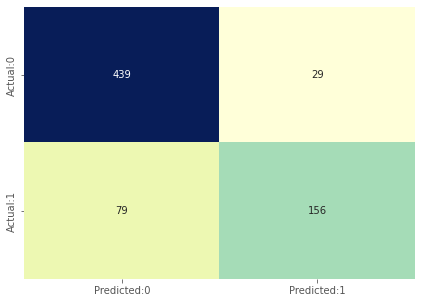

In [71]:
# Compute the confusion matrix
CM = confusion_matrix(y, y_pred_ensemble)

# Label the confusion matrix
conf_matrix = pd.DataFrame(data=CM, columns=['Predicted:0','Predicted:1'],
                           index=['Actual:0','Actual:1'])

# Set size of plot
plt.figure(figsize=(7, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

- 108 patients are misclassified.
- 79 patients were diabetic but were classified as non-diabetic.
- 29 patients were non-diabetic but were classified as diabetic.

###### 8.2 AUC-ROC Curve

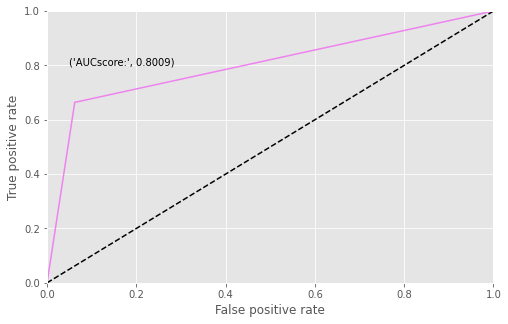

In [72]:
# Set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y,y_pred_ensemble)

# Plot the ROC curve
with plt.style.context('ggplot'):
    plt.plot(fpr,tpr,color='violet')
    # Set limits for x and y axes
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    # Plot the straight line showing worst prediction of the model
    plt.plot([0,1],[0,1],'k--')
    # Add the AUC score
    plt.text(x=0.05, y=0.8, 
             s=('AUCscore:', round(roc_auc_score(y,y_pred_ensemble),4)))
    # Name the plot, and both axes
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    # Plot the grid
    plt.grid(True)
    plt.show()

- AUC score is 80% which can be considered that our model is good at distinguishing diabetic and non-diabetic patients.
- The curve is closer to the top-left corner which indicates a better performance.

###### 8.3 Performance Metrics in Tabulated Format

In [73]:
table_VC = [['AUC Score', metrics.roc_auc_score(y,y_pred_ensemble)],
            ['Precision Score', metrics.precision_score(y,y_pred_ensemble)],
            ['Recall Score', metrics.recall_score(y,y_pred_ensemble)],
            ['Accuracy Score', metrics.accuracy_score(y,y_pred_ensemble)],
            ['f1-score', metrics.f1_score(y,y_pred_ensemble)]]

print(tabulate(table_VC, headers=['Performance Metric', 'Score'],
               tablefmt='rst'))

====================  ========
Performance Metric       Score
====================  ========
AUC Score             0.800932
Precision Score       0.843243
Recall Score          0.66383
Accuracy Score        0.846373
f1-score              0.742857
====================  ========


### 9. Conclusion

As the dataset that we have is imbalanced, the best performance metric is f1-score. In our case the f1-score is pretty good, which means our model performance is good. Other performance metrics is also showing good score.